<a href="https://colab.research.google.com/github/alejandra2826/Alejandra-Trujillo/blob/Practica2/Practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
TOPICO DE LA INDUTRIA 1
ALEJANDRA ELIZABETH Trujillo Navarro
Practica # 2

#**MODULES**


In [ ]:
import math
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from scipy.stats import exponweib
#############################################NUEVOS MODULOS#####################
import pandas as pd
from scipy.stats import levy_stable

#**CLASSES**

In [ ]:
# Nota: Esta clase la importaremos junto con el segundo bloque de modulos
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)
   # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

#About RVS and Histograms

In [ ]:
# Argumentos para Weibull
a = 0.1
b = 0.5
c = 1.0
d = 1.9

# Valor de resolution
resolution = 50
aux_domain = np.linspace(0, 4, resolution)

exponweib_pdf = np.array([exponweib.pdf(i,a,b,c,d) for i in aux_domain])

In [ ]:
fig_exponweib_pdf = go.Figure()

fig_exponweib_pdf.add_trace(go.Scatter(x = aux_domain,
                                       y = exponweib_pdf,
                                       marker = dict(size = 2),
                                       mode = 'lines',
                                       name = 'Weibull',
                                       showlegend = True))



#**Lévy distribution - Histograma + Curva**

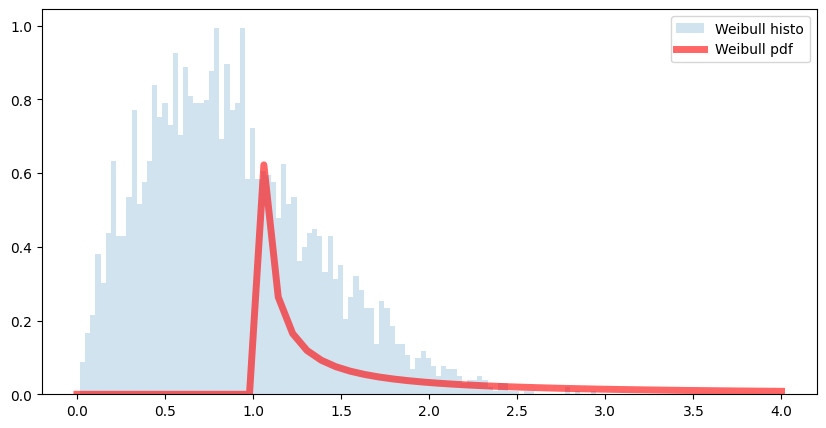

In [ ]:
sample_size = 3500
r = exponweib.rvs(c,d, size=sample_size)

fig, ax = plt.subplots(1,1)

fig.set_figheight(5)
fig.set_figwidth(10)

ax.hist(r, bins=100, density= True, histtype='stepfilled', alpha=0.2, label='Weibull histo')

ax.plot(aux_domain, exponweib_pdf, 'r-', lw=5, alpha=0.6, label='Weibull pdf')

# Desplegar leyendas
ax.legend(loc='best')

plt.show()